In [40]:
import pandas as pd
import numpy as np
from factor_analyzer.utils import covariance_to_correlation
import graphviz
import semopy
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
df_all = pd.read_csv('all_age.csv')

In [42]:
df_all

,gender,age,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,1,28,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,1,28,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,3.0000,3.0000,3.0000,3.0000,3.0000
2,1,28,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
3,1,20,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
4,1,27,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2,72,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,2.0000,4.3000,4.5000,4.5000,4.5000
800,2,71,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
801,2,72,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,3.3778,3.2333,3.5333,3.5333,3.5333
802,2,75,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [43]:
df_all.columns

Index(['gender', 'age', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [44]:
#カラム名が'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'のものを抽出
df_all_s = df_all[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,1.6111,3.1556,3.7000,3.6667,3.5000
1,3.0000,3.0000,3.0000,3.0000,3.0000
2,2.4667,2.4667,2.7333,2.6222,3.4222
3,2.2778,3.3778,3.9000,3.2889,3.7889
4,1.4444,4.4111,4.5778,4.1778,4.6889
...,...,...,...,...,...
799,2.0000,4.3000,4.5000,4.5000,4.5000
800,2.4667,4.0556,4.2778,3.7778,4.0333
801,3.3778,3.2333,3.5333,3.5333,3.5333
802,1.8444,4.6111,4.2444,4.0222,4.3333


In [45]:
# 各行の最大値を求める
df_all_s['max_value'] = df_all_s.max(axis=1)
# 各行で最大値の数をカウントする
df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)
df_all_s

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_87912/637014173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_value'] = df_all_s.max(axis=1)
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_87912/637014173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)


,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.6111,3.1556,3.7000,3.6667,3.5000,3.7000,1
1,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5
2,2.4667,2.4667,2.7333,2.6222,3.4222,3.4222,1
3,2.2778,3.3778,3.9000,3.2889,3.7889,3.9000,1
4,1.4444,4.4111,4.5778,4.1778,4.6889,4.6889,1
...,...,...,...,...,...,...,...
799,2.0000,4.3000,4.5000,4.5000,4.5000,4.5000,3
800,2.4667,4.0556,4.2778,3.7778,4.0333,4.2778,1
801,3.3778,3.2333,3.5333,3.5333,3.5333,3.5333,3
802,1.8444,4.6111,4.2444,4.0222,4.3333,4.6111,1


In [46]:
# # 各行の最大値を求める
# df_all_s['max_value'] = df_all_s.max(axis=1)

# # 各行で最大値の数をカウントする
# df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']), axis=1)

# 同点がない行のみを抽出する
df_all_s_drop = df_all_s[df_all_s['max_count'] == 1]
df_all_s_drop.head(30
                   )

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.6111,3.1556,3.7000,3.6667,3.5000,3.7000,1
2,2.4667,2.4667,2.7333,2.6222,3.4222,3.4222,1
3,2.2778,3.3778,3.9000,3.2889,3.7889,3.9000,1
4,1.4444,4.4111,4.5778,4.1778,4.6889,4.6889,1
5,2.3556,3.4556,3.3111,2.5222,3.9778,3.9778,1
7,3.2222,3.0333,3.1778,2.9444,3.1222,3.2222,1
8,2.8778,2.9778,3.0889,3.0222,3.4889,3.4889,1
9,3.0000,2.7333,3.0444,2.7333,3.1556,3.1556,1
10,2.0222,4.5556,4.8000,3.9444,4.2111,4.8000,1
11,2.7778,3.8000,4.2889,3.3000,4.2000,4.2889,1


In [47]:
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.6111,3.1556,3.7000,3.6667,3.5000,3.7000,1
1,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5
2,2.4667,2.4667,2.7333,2.6222,3.4222,3.4222,1
3,2.2778,3.3778,3.9000,3.2889,3.7889,3.9000,1
4,1.4444,4.4111,4.5778,4.1778,4.6889,4.6889,1
...,...,...,...,...,...,...,...
799,2.0000,4.3000,4.5000,4.5000,4.5000,4.5000,3
800,2.4667,4.0556,4.2778,3.7778,4.0333,4.2778,1
801,3.3778,3.2333,3.5333,3.5333,3.5333,3.5333,3
802,1.8444,4.6111,4.2444,4.0222,4.3333,4.6111,1


In [48]:
# # 各行ごとに等しい組み合わせを探す関数
# def find_equal_combinations(row):
#     values = row.values
#     columns = row.index
#     equal_combinations = []
#     # Broadcastingを利用して比較行列を作成
#     comparison_matrix = values[:, None] == values
#     # 対角成分を無視して、Trueのインデックスを取得
#     indices = np.where(np.triu(comparison_matrix, 1))
#     for i, j in zip(*indices):
#         equal_combinations.append((columns[i], columns[j]))
#     return equal_combinations

# df = df_all_s
# # 各IDごとに等しい組み合わせを確認
# df['equal_combinations'] = df.apply(find_equal_combinations, axis=1)

# # 結果を表示
# df[['equal_combinations']]

In [49]:
# #df[['equal_combinations']]とdf_allを結合
# df_all_equal = pd.concat([df_all, df[['equal_combinations']]], axis=1)
# df_all_equal

In [50]:
# #df[['equal_combinations']]の値がある行を削除
# df_all_s_drop = df_all_s.drop(index=df[df['equal_combinations'].apply(len) > 0].index)
# df_all_s_drop = df_all_s_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
# #df_all_s_dropの行数を確認
# print(df_all_s_drop.shape)
# df_all_s_drop

In [51]:
#df_all_s_drop
# #'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_s_drop_max = df_all_s_drop.idxmax(axis=1)
# #df_all_s_drop_maxの中の値をそれぞれカウント
df_all_s_drop_max.value_counts()


image_announce_s    271
announce_s          202
image_sound_s       108
image_s              90
none_s               13
Name: count, dtype: int64

<Axes: >

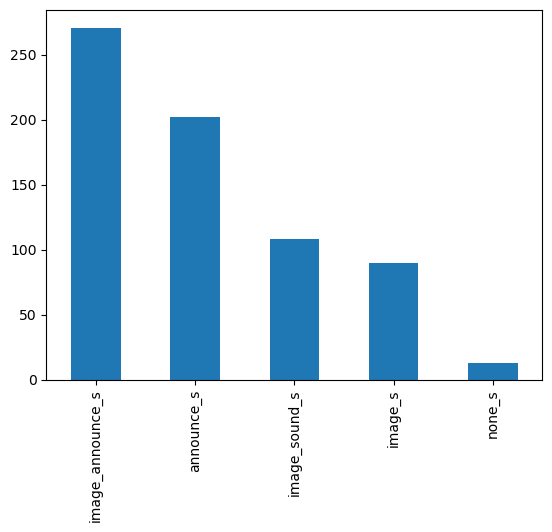

In [52]:
#'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の分布をグラフ表示（棒グラフ）縦軸がカウント数
df_all_s_drop_max.value_counts().plot(kind='bar')

In [53]:
#df_all_equal
#df[['equal_combinations']]の値がある行を削除
df_all_drop = df_all.drop(index=df_all[df_all_s['max_count'] != 1].index)
df_all_drop = df_all_drop[['gender','age','d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]
#df_all_s_dropの行数を確認
print(df_all_drop.shape)
df_all_drop

(684, 24)


,gender,age,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,1,28,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
2,1,28,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
3,1,20,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
4,1,27,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
5,1,24,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,...,16,11,22,22,3,2.3556,3.4556,3.3111,2.5222,3.9778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,70,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,...,30,14,14,10,5,2.3111,3.1778,3.8667,3.3556,4.0000
798,2,76,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,...,36,13,21,29,2,2.9667,2.8222,2.7556,2.8667,2.8778
800,2,71,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
802,2,75,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [54]:
#df_all_dropについて，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_drop_max = df_all_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']].idxmax(axis=1)
#df_all_drop_maxのカラムを追加
df_all_drop['max'] = df_all_drop_max
#df_all_maxの値ごとにクラス分け
df_all_drop['max1'] = df_all_drop['max'].map({'none_s': 0, 'image_s': 1, 'announce_s': 2, 'image_sound_s': 3, 'image_announce_s': 4})
#df_all_dropの行数を確認
df_all_drop

,gender,age,d1,d2,d3,d4,d5,w1,w2,w3,...,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max,max1
0,1,28,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000,announce_s,2
2,1,28,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222,image_announce_s,4
3,1,20,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889,announce_s,2
4,1,27,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889,image_announce_s,4
5,1,24,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,...,22,22,3,2.3556,3.4556,3.3111,2.5222,3.9778,image_announce_s,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,70,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,...,14,10,5,2.3111,3.1778,3.8667,3.3556,4.0000,image_announce_s,4
798,2,76,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,...,21,29,2,2.9667,2.8222,2.7556,2.8667,2.8778,none_s,0
800,2,71,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333,announce_s,2
802,2,75,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333,image_s,1


In [55]:
#各クラスごとに'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の値の平均値を計算
df_all_drop_g_max_mean = df_all_drop.groupby('max').mean()
df_all_drop_g_max_mean

,gender,age,d1,d2,d3,d4,d5,w1,w2,w3,...,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max1
max,,,,,,,,,,,,,,,,,,,,,
announce_s,1.485149,51.217822,6.270105,0.210965,4.388315,3.679060,5.685100,27.540742,18.744633,15.885963,...,21.153465,17.599010,12.579208,4.034653,2.381686,3.411384,4.014300,3.308524,3.725026,2.0
image_announce_s,1.472325,50.977860,6.156473,0.372582,4.335500,3.630876,5.522726,27.885527,19.116674,16.400021,...,21.546125,17.239852,13.623616,3.955720,2.387828,3.354449,3.539197,3.291841,3.915537,4.0
image_s,1.522222,45.933333,6.503689,0.645548,4.690821,3.684003,5.826028,27.441579,18.426510,15.997046,...,21.600000,16.700000,13.455556,4.000000,2.550618,3.922096,3.498277,3.613079,3.511356,1.0
image_sound_s,1.490741,47.703704,5.937888,0.736550,4.536592,3.721088,5.757237,26.534123,18.025829,15.946523,...,21.712963,17.870370,13.157407,3.629630,2.429633,3.472638,3.442801,3.835905,3.480660,3.0
none_s,1.384615,50.538462,6.050838,0.953369,4.196077,4.224525,5.598627,26.589081,17.682276,16.268788,...,19.846154,20.615385,17.769231,3.846154,3.163246,2.809385,2.800015,2.810262,2.886323,0.0


In [56]:
#各クラスごとに主観評価値の平均値を算出
df_all_drop_g_max_mean_max_s = df_all_drop_g_max_mean[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_drop_g_max_mean_max_s.max(axis=1)

max
announce_s          4.014300
image_announce_s    3.915537
image_s             3.922096
image_sound_s       3.835905
none_s              3.163246
dtype: float64

In [57]:
#excelファイルに書き出し
df_all_drop_exp = df_all_drop.drop(columns=['max', 'max1'])
df_all_drop_exp
df_all_drop_exp.to_excel('all_age_drop_exp.xlsx')

In [58]:
#csvファイルに書き出し
df_all_drop_exp.to_csv('all_age_drop_exp.csv')